In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = iris.data
y = iris.target

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier        # KNN 알고리즘 임포트

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)       # neighbor 개수

In [13]:
knn.fit(x_train, y_train)        # 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
from sklearn import metrics

In [15]:
print("Accuracy: ",knn.score(x_test, y_test))

Accuracy:  0.9111111111111111


In [16]:
k_range = range(1, 50)        # k 범위: 1~50
scores = {}
scores_list = []

# 지정해 놓은 범위 내에서 어떤 k값이 가장 높은 정확도를 갖는지 찾음
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_prediction = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test, y_prediction)
  scores_list.append(metrics.accuracy_score(y_test, y_prediction))

Text(0, 0.5, 'Accuracy')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


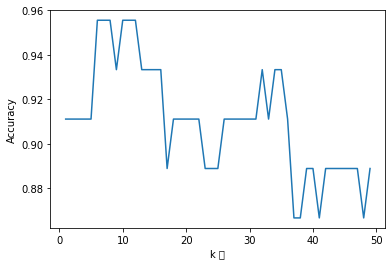

In [17]:
plt.plot(k_range, scores_list)
plt.xlabel('k 값')
plt.ylabel('Accuracy')